In [3]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from pathlib import Path

In [4]:
sys.path.append(os.path.expanduser('~/Documents/telegates'))
from telegates.processing import deseasonalize

In [5]:
var = 't2m_europe'
gridpoint = (52,7) # lat, lon

paths = {'norm': Path(f'/scistor/ivm/jsn295/ERA5/{var}.nc'),
         'anom' : Path(f'/scistor/ivm/jsn295/processed/{var}.anom.nc'), # Old way of computing
         'poly_d3' : Path(f'/scistor/ivm/jsn295/paper4/anomalies/full/{var}.anom.deg3.nc'),
         'poly_d5' : Path(f'/scistor/ivm/jsn295/paper4/anomalies/full/{var}.anom.deg5.nc'),
         'poly_d7' : Path(f'/scistor/ivm/jsn295/paper4/anomalies/full/{var}.anom.deg7.nc'),
         'poly20_d3' : Path(f'/scistor/ivm/jsn295/paper4/anomalies/last20/{var}.anom.deg3.nc'),
         'poly20_d5' : Path(f'/scistor/ivm/jsn295/paper4/anomalies/last20/{var}.anom.deg5.nc'),
         'poly20_d7' : Path(f'/scistor/ivm/jsn295/paper4/anomalies/last20/{var}.anom.deg7.nc')}

slices = {key:xr.open_dataarray(path).sel(latitude = gridpoint[0], longitude = gridpoint[1]).load() for key,path in paths.items()}

In [6]:
timeslice = slice('2000-01-01','2019-12-31')
seasonality = {}
mean = {}
for key, array in slices.items():
    subset = array.sel(time = timeslice)
    seasonality.update({key:subset.groupby(subset.time.dt.month).mean().to_pandas()})
    mean.update({key:float(subset.mean())})
seasonality = pd.DataFrame(seasonality)
mean = pd.Series(mean)

Text(0.5, 1.0, 't2m_europe, lat: 52, lon: 7, s: 2000-01-01 : 2019-12-31')

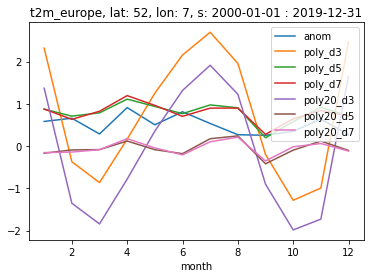

In [7]:
seasonality.drop('norm', axis = 1).plot()
plt.title(f'{var}, lat: {gridpoint[0]}, lon: {gridpoint[1]}, s: {timeslice.start} : {timeslice.stop}')

In [8]:
mean

norm         283.753448
anom           0.503006
poly_d3        0.789221
poly_d5        0.789733
poly_d7        0.790125
poly20_d3     -0.048999
poly20_d5     -0.047877
poly20_d7     -0.047346
dtype: float64

In [45]:
timeslice = slice('2000-01-01','2019-12-31')
sst = xr.open_dataarray(Path(f'/scistor/ivm/jsn295/paper4/anomalies/full/sst_nhplus.anom.deg3.nc')).sel(latitude = slice(10,60), longitude = slice(-20,20), time = timeslice)

In [46]:
timemean = sst.mean('time')

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


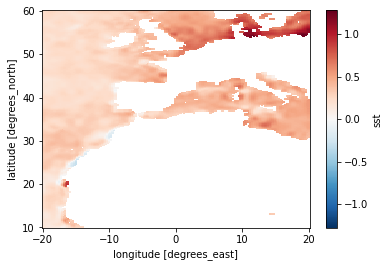

In [47]:
timemean.plot()

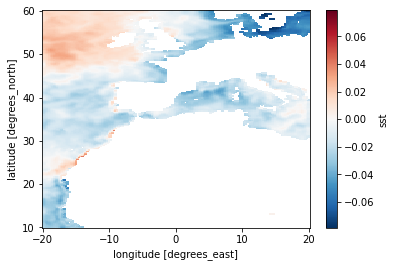

In [43]:
timemean.plot()

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/numpy/lib/nanfunctions.py:1667: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)


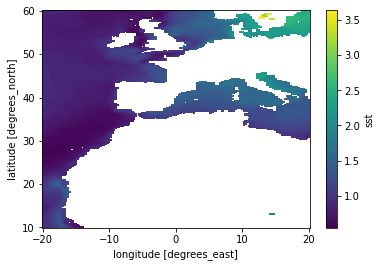

In [44]:
sst.std('time').plot()

In [90]:
sst = xr.open_dataarray(Path(f'/scistor/ivm/jsn295/ERA5/sst_nhplus.nc')).sel(latitude = slice(10,60), longitude = slice(-20,20), time = timeslice)

In [91]:
sstanom, poly = deseasonalize(sst, return_polyval=True, degree = 7)

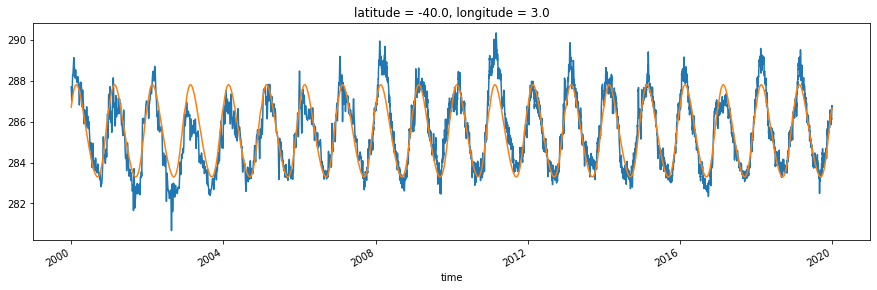

In [94]:
gridpoint = (55,3)
fig, ax = plt.subplots(figsize = (15,4))
sst.sel(latitude = gridpoint[0], longitude = gridpoint[1]).plot(ax = ax)
poly.sel(latitude = gridpoint[0], longitude = gridpoint[1]).plot(ax = ax)

In [82]:
seas = sstanom.groupby(sstanom.time.dt.month).mean()

/scistor/ivm/jsn295/JUPVENV/lib64/python3.6/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


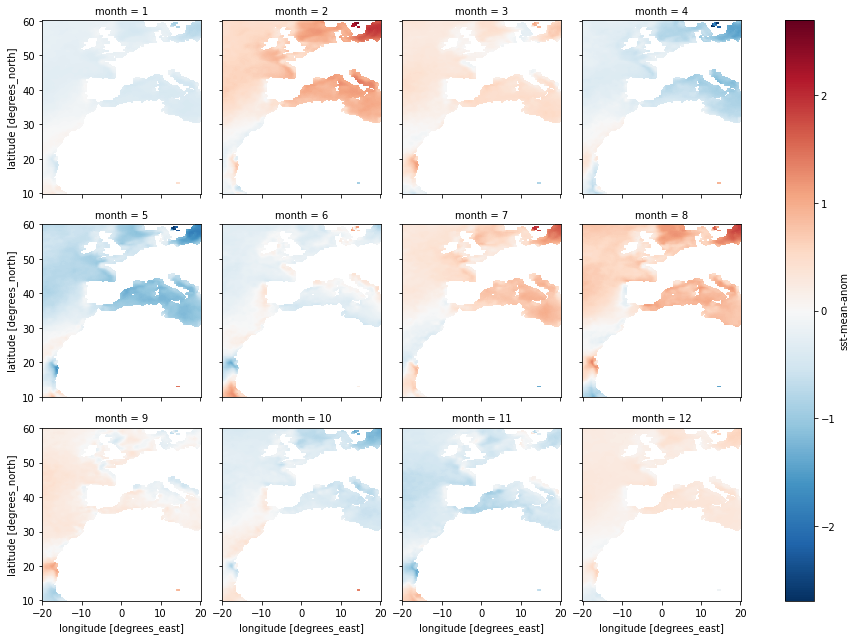

In [61]:
seas.plot(col = 'month', col_wrap = 4)

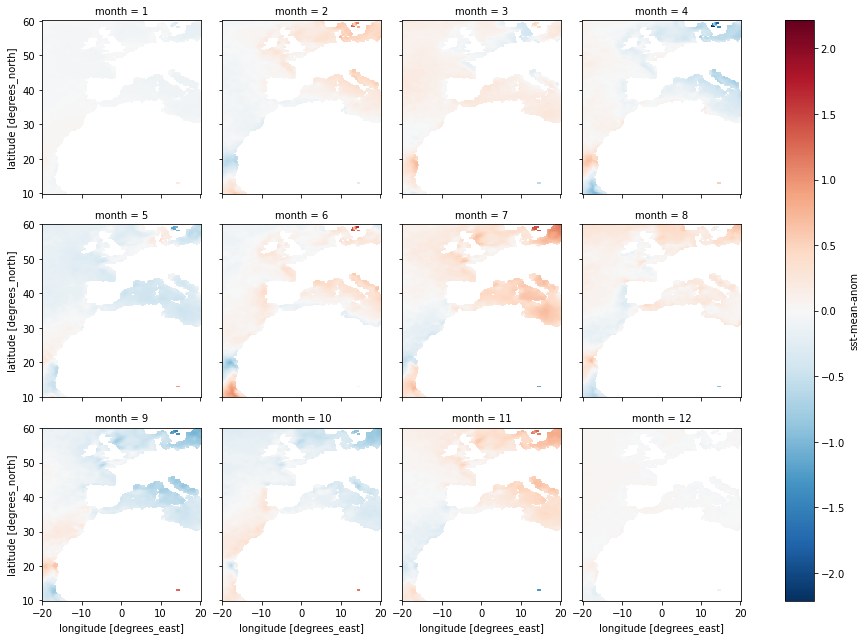

In [65]:
seas.plot(col = 'month', col_wrap = 4)

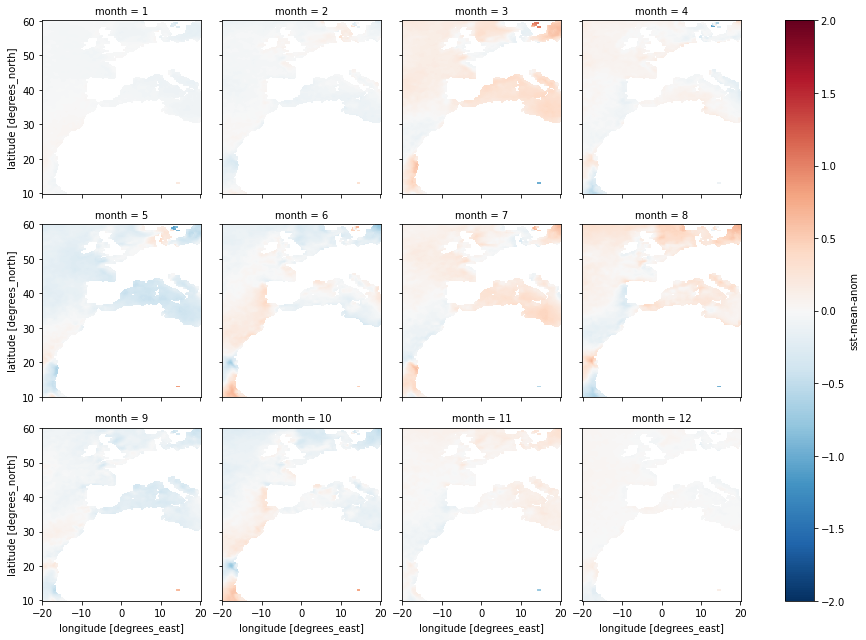

In [79]:
seas.plot(col = 'month', col_wrap = 4, vmin = -2, vmax = 2, cmap = 'RdBu_r')

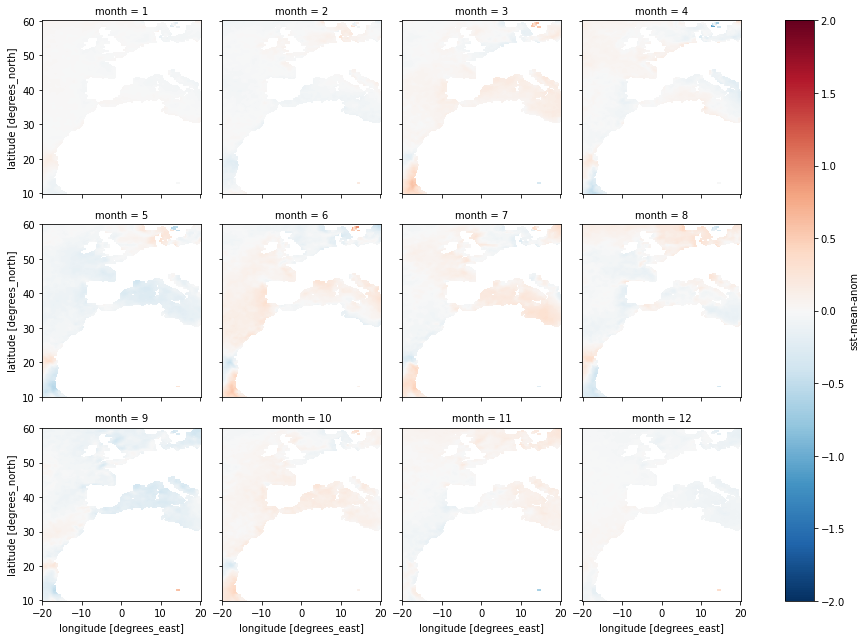

In [83]:
seas.plot(col = 'month', col_wrap = 4, vmin = -2, vmax = 2, cmap = 'RdBu_r')